In [ ]:
!pip install rasterio
import rasterio as ro

In [3]:
dataset = ro.open("Letch.tif")

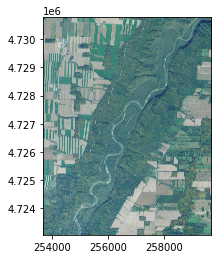

In [4]:
from rasterio.plot import show
show(dataset)

In [5]:
dataset.name

'Letch.tif'

In [6]:
dataset.count
#shows the number of bands

4

In [7]:
dataset.width
#shows the number of pixels per row

5968

In [8]:
dataset.height
#shows how many pixels per column

7722

In [9]:
dataset.bounds
#shows the geographic coordinates of the image

BoundingBox(left=253683.0, bottom=4723056.0, right=259651.0, top=4730778.0)

In [10]:
dataset.crs

CRS.from_epsg(26918)

In [11]:
dataset.crs.linear_units

'metre'

In [20]:
#reading the individual bands of the data
#index starts at 1 not 0
red = dataset.read(1)

In [21]:
red

array([[ 52,  49,  51, ...,  64,  75,  82],
       [ 50,  51,  53, ...,  66,  77,  76],
       [ 53,  51,  48, ...,  69,  66,  63],
       ...,
       [ 31,  37,  38, ...,  85, 103, 121],
       [ 34,  37,  38, ...,  89, 101, 107],
       [ 35,  36,  41, ...,  93,  96,  96]], dtype=uint8)

In [22]:
red.shape

(7722, 5968)

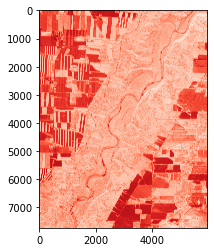

In [25]:
show(red, cmap="Reds")

In [26]:
import matplotlib.pyplot as plt


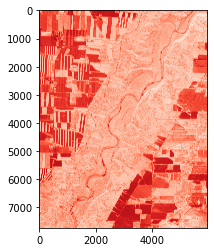

In [27]:
plt.imshow(red, cmap="Reds")

In [28]:
#to show false color image
nir = dataset.read(4)
blue = dataset.read(3)
green = dataset.read(2)

In [29]:
import numpy as np

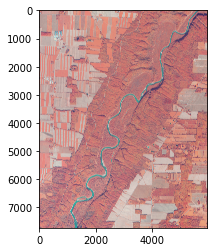

In [31]:
combined_data = np.dstack((nir,green,blue))
plt.imshow(combined_data)

In [32]:
type(red)

numpy.ndarray

In [33]:
np.mean(red)

100.15755042606584

In [34]:
np.median(red)

87.0

In [35]:
np.max(red)

255

In [36]:
np.min(red)

0

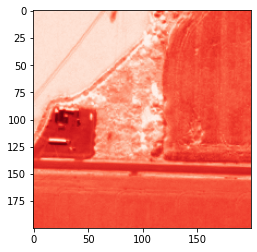

In [38]:
#creating a histogram for a band
red_small = red[:200, :200]
show(red_small, cmap="Reds")

(array([    0.,   374.,  6560.,  2273.,  2855.,  2661.,  2073., 14842.,
         5862.,  2182.,   119.,   111.]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240]),
 <a list of 12 Patch objects>)

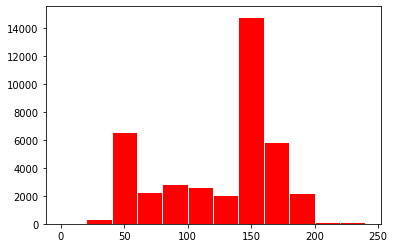

In [41]:
plt.hist(red_small.ravel(), bins=range(0,256,20), color="red", edgecolor="white")
#need to use the ravel function in order to read it as an array, flattens a 2D object to 1D

In [42]:
#transform function
dataset.transform

Affine(1.0, 0.0, 253683.0,
       0.0, -1.0, 4730778.0)

In [43]:
dataset.transform * (0,0)
#gives the coordinate system of this pixel

(253683.0, 4730778.0)

In [44]:
dataset.transform * (1,1)

(253684.0, 4730777.0)